In [585]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [514]:
df = pd.read_csv("insurance.csv" )

In [515]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [516]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [517]:
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


# ---------- DATA CLEANING ------------ 

## --Drop null values 


In [520]:
df.dropna(inplace=True)

In [521]:
null_count = df.isnull().sum()
null_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [522]:
unique_values_age = df['age'].unique()
print(unique_values_age)
print("---------------------------------------")
unique_values_sex = df['sex'].unique()
print(unique_values_sex)
print("---------------------------------------")
unique_values_bmi= df['bmi'].unique()
print(unique_values_bmi)
print("---------------------------------------")
unique_values_chil = df['children'].unique()
print(unique_values_chil)
print("---------------------------------------")
unique_values_smo = df['smoker'].unique()
print(unique_values_smo)
print("---------------------------------------")
unique_values_reg = df['region'].unique()
print(unique_values_reg)
print("---------------------------------------")
unique_values_cha = df['charges'].unique()
print(unique_values_cha)
print("---------------------------------------")

[ 19.  18.  28.  33.  32. -31.  46.  37.  60.  25.  62.  23.  56. -27.
  52. -23.  30.  59.  63.  55.  31.  22.  26.  35.  24.  41.  48.  36.
  40.  58.  34.  43.  64.  20.  61.  27.  53.  44.  57.  21. -41.  45.
 -35.  54.  38.  29.  49.  47.  51.  42.  50. -39. -28. -40.  39. -25.
 -52. -26. -44. -47. -45. -57. -43. -50. -58. -56. -30. -51. -60. -37.
 -22. -36. -21. -18. -55. -20. -19. -34. -64. -33.]
---------------------------------------
['female' 'male' 'woman' 'F' 'man' 'M']
---------------------------------------
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   28.025 27.72  23.085 32.775 17.385 36.3   35.6
 26.315 28.31  36.4   20.425 32.965 20.8   36.67  39.9   26.6   36.63
 21.78  37.3   38.665 34.77  24.53  35.625 28.    34.43  28.69  36.955
 31.825 31.68  37.335 27.36  33.66  24.7   22.42  39.1   36.19  23.98
 24.75  28.5   28.1   32.01  27.4   34.01  35.53  26.8

### -- Get the absaolute value of the "age" column without any charactors 

In [524]:
df['age'] = df['age'].abs()
df['age']

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1208, dtype: float64

### --Replace the Null values with mean value

In [526]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['age']

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1208, dtype: float64

### -- Change the data type of the age to integer

In [528]:
df['age'] = df['age'].round().astype(int)

### --Check the values again

In [530]:
unique_values_age = df['age'].unique()
print(unique_values_age)

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 59 63 55 22 26 35 24 41
 48 36 40 58 34 43 64 20 61 53 44 57 21 45 54 38 29 49 47 51 42 50 39]


### -- Standadize date in 'sex' column

In [532]:
# Replace NaN values
df['sex'] = df['sex'].replace('nan', pd.NA)

# Mapping values to 'male' or 'female'
mapping = {
    'female': 'female',
    'woman': 'female',
    'F': 'female',
    'male': 'male',
    'man': 'male',
    'M': 'male'
}

df['sex'] = df['sex'].map(mapping)

print(df)

      age     sex     bmi  children smoker     region       charges
0      19  female  27.900       0.0    yes  southwest     16884.924
1      18    male  33.770       1.0     no  Southeast     1725.5523
2      28    male  33.000       3.0     no  southeast     $4449.462
3      33    male  22.705       0.0     no  northwest  $21984.47061
4      32    male  28.880       0.0     no  northwest    $3866.8552
...   ...     ...     ...       ...    ...        ...           ...
1333   50    male  30.970       3.0     no  Northwest   $10600.5483
1334   18  female  31.920       0.0     no  Northeast     2205.9808
1335   18  female  36.850       0.0     no  southeast    $1629.8335
1336   21  female  25.800       0.0     no  southwest      2007.945
1337   61  female  29.070       0.0    yes  northwest    29141.3603

[1208 rows x 7 columns]


### -- Remove special charactors in the colum 'Children'

In [534]:
df['children'] = df['children'].abs()
df['children']

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1208, dtype: float64

### --Change the data type of the 'children' column

In [536]:
df['children'] = df['children'].round().astype(int)

### --Check values again


In [538]:
unique_values_chil = df['children'].unique()
print(unique_values_chil)

[0 1 3 2 4 5]


### -- Change the 'region' column to lowercase

In [540]:
df['region']= df['region'].str.lower()

In [541]:
unique_values_reg = df['region'].unique()
print(unique_values_reg)

['southwest' 'southeast' 'northwest' 'northeast']


## -- Remove the $ sign and convert 'charges' column to float

In [543]:
df['charges'] = df['charges'].replace(r'[\$,]', '', regex=True).astype(float)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1208 rows x 7 columns]


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   int32  
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   int32  
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 66.1+ KB


# ----------------- Data Visualization ------------------------

### -- Creating Scatter chart for each variable with charges 

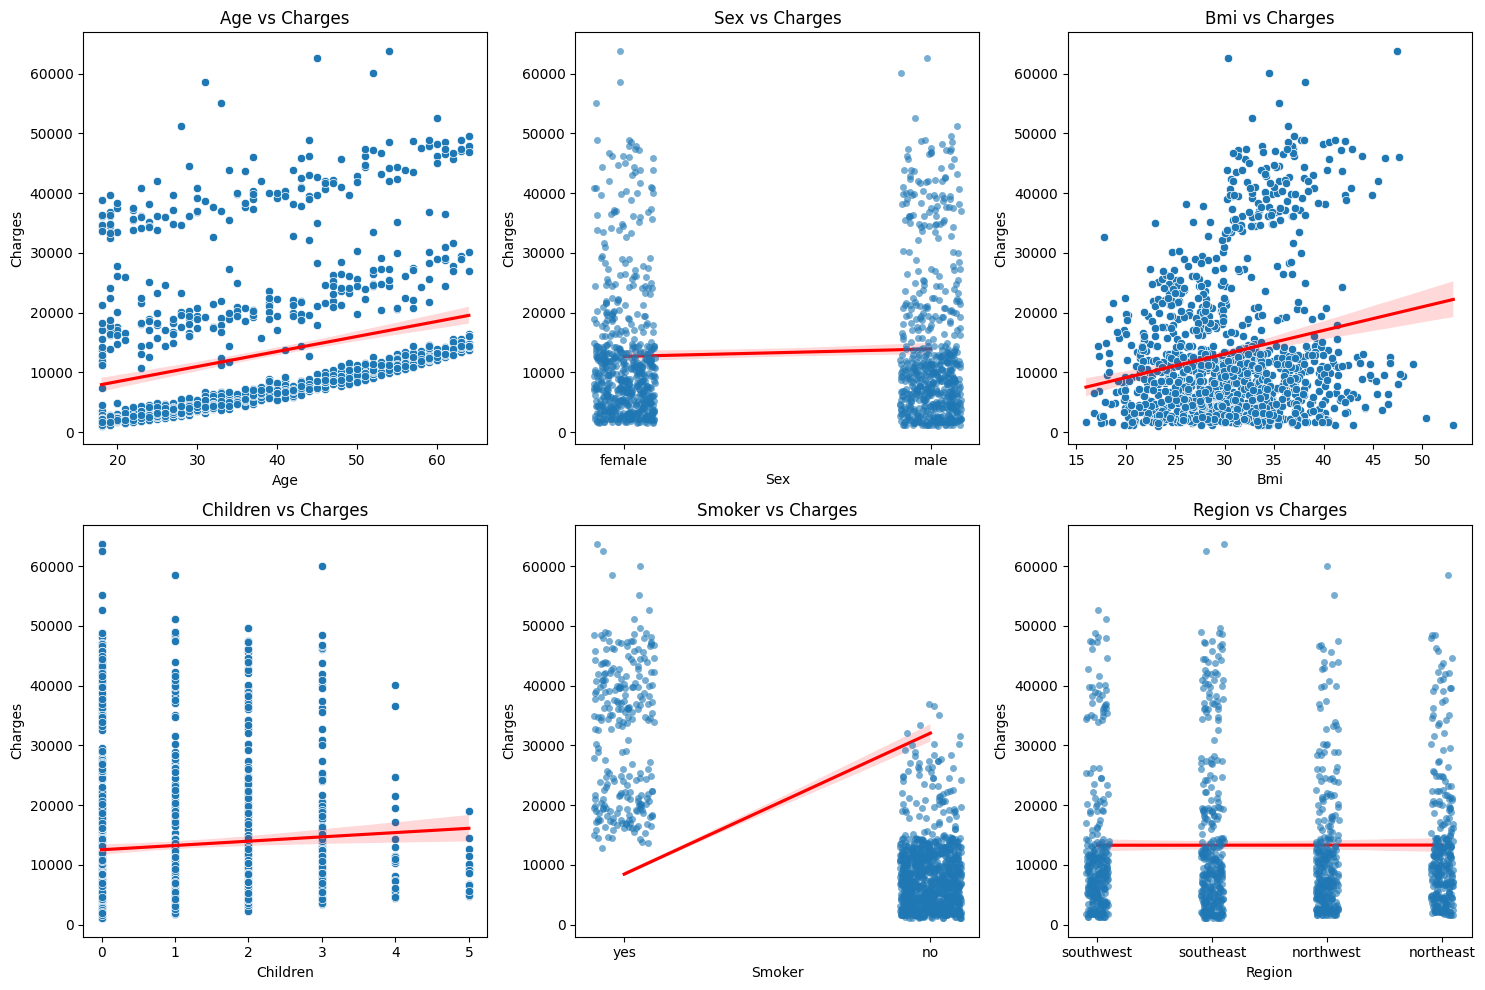

In [547]:
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    if df[var].dtype == 'object':
        sns.stripplot(x=var, y='charges', data=df, jitter=True, alpha=0.6)
        sns.regplot(x=pd.Categorical(df[var]).codes, y='charges', data=df, scatter=False, color='red')
        plt.xticks(ticks=range(len(df[var].unique())), labels=df[var].unique())
    else:
        sns.scatterplot(x=var, y='charges', data=df)
        sns.regplot(x=var, y='charges', data=df, scatter=False, color='red')
    plt.title(f'{var.capitalize()} vs Charges')
    plt.xlabel(var.capitalize())
    plt.ylabel('Charges')

plt.tight_layout()
plt.show()

               age       bmi  children   charges
age       1.000000  0.118082  0.058933  0.291875
bmi       0.118082  1.000000  0.018996  0.199039
children  0.058933  0.018996  1.000000  0.071256
charges   0.291875  0.199039  0.071256  1.000000


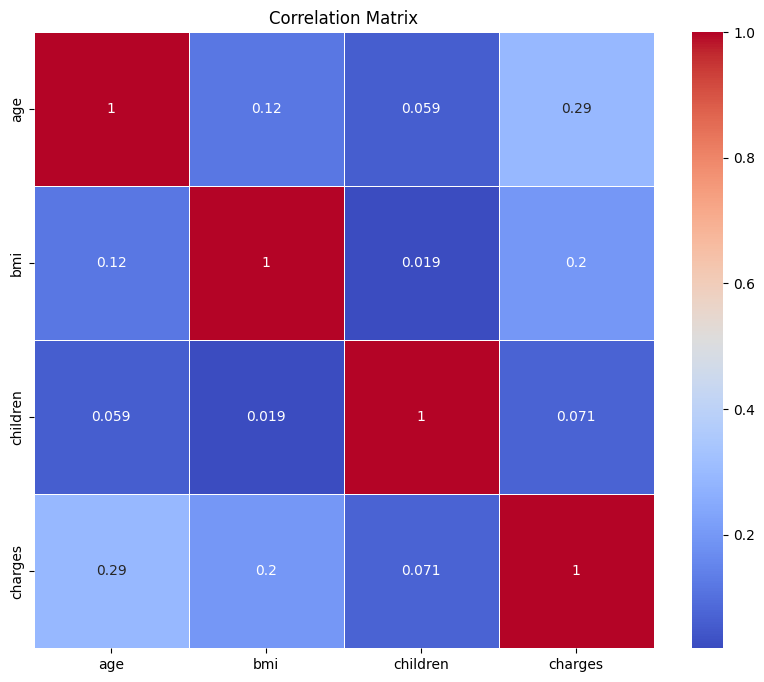

In [548]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# -- Preparing the dataset to train

### Convert 'smoker' column to numerical values

In [551]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

### One-hot encode the 'region' column

In [553]:
df_new = pd.get_dummies(df, prefix='region', columns=['region'])

### Convert 'sex' column to a numerical column 'is_male'

In [555]:
df_new['is_male'] = (df_new['sex'] == 'male').astype(int)
# Drop the original 'sex' column
df_new.drop(columns=['sex'], inplace=True)

### Ensure boolean columns are converted to integers

In [557]:
boolean_columns = df_new.select_dtypes(include='bool').columns
df_new[boolean_columns] = df_new[boolean_columns].astype(int)
# Output the cleaned and encoded data frame
print(df_new)

      age     bmi  children  smoker      charges  region_northeast  \
0      19  27.900         0       1  16884.92400                 0   
1      18  33.770         1       0   1725.55230                 0   
2      28  33.000         3       0   4449.46200                 0   
3      33  22.705         0       0  21984.47061                 0   
4      32  28.880         0       0   3866.85520                 0   
...   ...     ...       ...     ...          ...               ...   
1333   50  30.970         3       0  10600.54830                 0   
1334   18  31.920         0       0   2205.98080                 1   
1335   18  36.850         0       0   1629.83350                 0   
1336   21  25.800         0       0   2007.94500                 0   
1337   61  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  is_male  
0                    0                 0                 1        0  
1                  

In [604]:
df_new = df_new.dropna()
# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2_score = r2_score(y_test,y_pred)
r2_score

0.7049323160872816

# ----------------------- Data Validation ----------------------

In [602]:
df_val = pd.read_csv('validation_dataset.csv')
df_val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [610]:
def preprocess_df(df):
    df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
    df_new = pd.get_dummies(df, prefix='region', columns=['region'])
    df_new['is_male'] = (df_new['sex'] == 'male').astype(int)
    df_new.drop(columns=['sex'], inplace=True)
    boolean_columns = df_new.select_dtypes(include='bool').columns
    df_new[boolean_columns] = df_new[boolean_columns].astype(int)

    return df_new

In [612]:
input_df = preprocess_df(df_val)
predictions = model.predict(input_df)
validation_data = df_val.copy()
validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges']<1000, 'predicted_charges']*1000
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,0,southeast,352.537878
1,39.0,male,26.410000,0.0,1,northeast,30956.214707
2,27.0,male,29.150000,0.0,1,southeast,27799.409607
3,71.0,male,65.502135,13.0,1,southeast,57194.414804
4,28.0,male,38.060000,0.0,0,southeast,6685.426312
5,70.0,female,72.958351,11.0,1,southeast,58677.838443
6,29.0,female,32.110000,2.0,0,northwest,7044.405963
7,42.0,female,41.325000,1.0,0,northeast,13065.658004
8,48.0,female,36.575000,0.0,0,northwest,12665.703636
9,63.0,male,33.660000,3.0,0,southeast,16142.541083
